<a href="https://colab.research.google.com/github/seul15/poison_mushroom_classification/blob/master/4438%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 코랩에서 kaggle dataset 사용하는 방법
[https://soohee410.github.io/colab_kaggle](https://soohee410.github.io/colab_kaggle)

[https://kubig-2021-2.tistory.com/35](https://kubig-2021-2.tistory.com/35)

In [ ]:
# kaggle 설치
!pip install kaggle
from google.colab import files
files.upload() # kaggle.json 업로드

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leeseullee","key":"4ae04d77f199decd8aa7a0252581c5c6"}'}

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# 데이터셋 다운로드
!kaggle datasets download -d harperd17/mushroom-pictures

100% 56.1M/56.1M [00:00<00:00, 109MB/s]
100% 56.1M/56.1M [00:00<00:00, 118MB/s]


In [ ]:
!ls

kaggle.json  mushroom-pictures.zip  sample_data


In [ ]:
# 데이터셋 압축 해제
!unzip mushroom-pictures.zip

Archive:  mushroom-pictures.zip
  inflating: All_Mushroom_Data/Amanita bisporigera/100598.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100599.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100600.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100626.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100628.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100629.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100630.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/100631.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101388.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101389.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101528.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101529.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101751.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101752.jpg  
  inflating: All_Mushroom_Data/Amanita bisporigera/101753.jpg  
  inflat

In [ ]:
!pwd

/content


In [ ]:
!ls

All_Mushroom_Data  kaggle.json	mushroom-pictures.zip  sample_data


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn # 손실, 활성화 함수, 신경망 생성을 위한 풀링 함수 포함
from torch import optim # optimizer
import torch.nn.functional as F
from torchvision import datasets, transforms, models

from torchvision import transforms
from torchvision import datasets

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
# pre-trained model 불러오기
# 이미지 분류 문제를 해결할 수 있도록 규모가 큰 데이터로 미리 학습된 모델
model = models.resnet152(pretrained=True)
print(model)

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
for param in model.parameters():
    param.requires_grad = False

# 순서를 갖는 모듈의 컨테이너
# 정의된 것과 같은 순서로 모든 모듈들을 통해 전달 -> 신경망을 빠르게 제작
# 참고: https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html    
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.3),
                                 nn.Linear(512, 12),
                                 nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
import os
from os import path
import glob

In [ ]:
####데이터 알규먼트
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

##여기서 잠깐!##
All_Mushroom_Data 폴더명 변경해주기  
아래와 같이, 안에 있는 폴더명 띄어쓰기를 언더바로 바꿔준다!

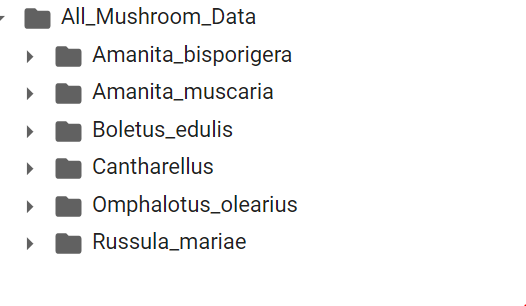

In [ ]:
###All_Mushroom_Data 폴더명 변경해주기
mushrooms = ['Amanita_bisporigera', 'Amanita_muscaria', 'Boletus_edulis', 'Cantharellus', 'Omphalotus_olearius', 'Russula_mariae']
path = '/content/All_Mushroom_Data'
Amanita_bisporigera = glob.glob(path+'/Amanita_bisporigera'+'/*')
Amanita_muscaria = glob.glob(path+'/Amanita_muscaria'+'/*')
Boletus_edulis = glob.glob(path+'/Boletus_edulis'+'/*')
Cantharellus = glob.glob(path+'/Cantharellus'+'/*')
Omphalotus_olearius = glob.glob(path+'/Omphalotus_olearius'+'/*')
Russula_mariae = glob.glob(path+'/Russula_mariae'+'/*')

In [ ]:
# 원본
sum = 0
for elem in mushrooms:
  print(f'{elem} 이미지 개수: {len(globals()[elem])}개')
  sum += len(globals()[elem])
print(f'총 이미지 개수: {sum}')

Amanita_bisporigera 이미지 개수: 606개
Amanita_muscaria 이미지 개수: 367개
Boletus_edulis 이미지 개수: 444개
Cantharellus 이미지 개수: 1183개
Omphalotus_olearius 이미지 개수: 59개
Russula_mariae 이미지 개수: 235개
총 이미지 개수: 2894


In [ ]:
print(globals()[mushrooms[0]])

['/content/All_Mushroom_Data/Amanita_bisporigera/247278.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/490866.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/538643.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/262235.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/558135.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/536950.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/362427.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/252963.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/118994.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/225614.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/230748.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/53035.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/224792.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/252960.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/50779.jpg', '/content/All_Mushroom_Data/Amanita_bisporigera/326347.jpg', '/content/All_Mushroom_Da

In [ ]:
print(len(mushrooms))

6


In [ ]:
# for elem in globals()[mushrooms[0][:100]]:
#     img = load_img(elem)  # PIL 이미지
#     x = img_to_array(img)  # (3, 150, 150) 크기의 NumPy 배열
#     x = x.reshape((1,) + x.shape)  # (1, 3, 150, 150) 크기의 NumPy 배열
#     i = 0

#     for batch in datagen.flow(x, batch_size=1,
#                               save_to_dir='/content/All_Mushroom_Data/Amanita_bisporigera', save_prefix='1', save_format='jpeg'):

#         i += 1
#         if i > 0:
#             break  # 이미지 100*1장을 생성하고 마칩니다

for elem in globals()[mushrooms[1]]:
    img = load_img(elem)  # PIL 이미지
    x = img_to_array(img)  # (3, 150, 150) 크기의 NumPy 배열
    x = x.reshape((1,) + x.shape)  # (1, 3, 150, 150) 크기의 NumPy 배열
    i = 0

    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='/content/All_Mushroom_Data/Amanita_muscaria', save_prefix='1', save_format='jpeg'):

        i += 1
        if i > 0:
            break  # 이미지 전체*2장을 생성하고 마칩니다

for elem in globals()[mushrooms[2][:200]]:
    img = load_img(elem)  # PIL 이미지
    x = img_to_array(img)  # (3, 150, 150) 크기의 NumPy 배열
    x = x.reshape((1,) + x.shape)  # (1, 3, 150, 150) 크기의 NumPy 배열
    i = 0

    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='/content/All_Mushroom_Data/Boletus_edulis', save_prefix='1', save_format='jpeg'):

        i += 1
        if i > 0:
            break  # 이미지 200장을 생성하고 마칩니다


for elem in globals()[mushrooms[4]]:
    img = load_img(elem)  # PIL 이미지
    x = img_to_array(img)  # (3, 150, 150) 크기의 NumPy 배열
    x = x.reshape((1,) + x.shape)  # (1, 3, 150, 150) 크기의 NumPy 배열
    i = 0

    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='/content/All_Mushroom_Data/Omphalotus_olearius', save_prefix='1', save_format='jpeg'):

        i += 1
        if i > 8:
            break  # 이미지 전체 * 10장을 생성하고 마칩니다

for elem in globals()[mushrooms[5]]:
    img = load_img(elem)  # PIL 이미지
    x = img_to_array(img)  # (3, 150, 150) 크기의 NumPy 배열
    x = x.reshape((1,) + x.shape)  # (1, 3, 150, 150) 크기의 NumPy 배열
    i = 0

    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='/content/All_Mushroom_Data/Russula_mariae', save_prefix='1', save_format='jpeg'):

        i += 1
        if i > 0:
            break  # 이미지 전체 * 2장을 생성하고 마칩니다

In [ ]:
mushrooms = ['Amanita_bisporigera', 'Amanita_muscaria', 'Boletus_edulis', 'Cantharellus', 'Omphalotus_olearius', 'Russula_mariae']
path = '/content/All_Mushroom_Data'
Amanita_bisporigera = glob.glob(path+'/Amanita_bisporigera'+'/*')
Amanita_muscaria = glob.glob(path+'/Amanita_muscaria'+'/*')
Boletus_edulis = glob.glob(path+'/Boletus_edulis'+'/*')
Cantharellus = glob.glob(path+'/Cantharellus'+'/*')
Omphalotus_olearius = glob.glob(path+'/Omphalotus_olearius'+'/*')
Russula_mariae = glob.glob(path+'/Russula_mariae'+'/*')

In [ ]:
# 늘린 데이터셋
sum = 0
for elem in mushrooms:
  print(f'{elem} 이미지 개수: {len(globals()[elem])}개')
  sum += len(globals()[elem])
print(f'총 이미지 개수: {sum}')

Amanita_bisporigera 이미지 개수: 606개
Amanita_muscaria 이미지 개수: 727개
Boletus_edulis 이미지 개수: 879개
Cantharellus 이미지 개수: 1183개
Omphalotus_olearius 이미지 개수: 574개
Russula_mariae 이미지 개수: 469개
총 이미지 개수: 4438


In [ ]:
!mkdir test
!mkdir train

In [ ]:
%cd /content/test
for mushroom in mushrooms:
  os.mkdir(mushroom)

%cd /content/train
for mushroom in mushrooms:
  os.mkdir(mushroom)  

/content/test
/content/train


In [ ]:
test_ratio = 0.2
Amanita_bisporigera_test_count = round(len(Amanita_bisporigera)*test_ratio)
Amanita_muscaria_test_count = round(len(Amanita_muscaria)*test_ratio)
Boletus_edulis_test_count = round(len(Boletus_edulis)*test_ratio)
Cantharellus_test_count = round(len(Cantharellus)*test_ratio)
Omphalotus_olearius_test_count = round(len(Omphalotus_olearius)*test_ratio)
Russula_mariae_test_count = round(len(Russula_mariae)*test_ratio)

for elem in mushrooms:
  print(f'{elem} test 파일에 들어가는 이미지 개수:', end= ' ')
  print(globals()[elem+'_test_count'], end=' / ')
  print(len(globals()[elem]))

Amanita_bisporigera test 파일에 들어가는 이미지 개수: 121 / 606
Amanita_muscaria test 파일에 들어가는 이미지 개수: 145 / 727
Boletus_edulis test 파일에 들어가는 이미지 개수: 176 / 879
Cantharellus test 파일에 들어가는 이미지 개수: 237 / 1183
Omphalotus_olearius test 파일에 들어가는 이미지 개수: 115 / 574
Russula_mariae test 파일에 들어가는 이미지 개수: 94 / 469


In [ ]:
import random
import shutil
def split(img_list, test_count, train_path, test_path):
  # image shuffle
  np.random.shuffle(img_list)

  test_files=[]
  for i in random.sample(img_list, test_count):
    test_files.append(i)

  train_files = [x for x in img_list if x not in test_files]

  for k in train_files:
    shutil.copy(k, train_path)

  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수: {}\ntest 폴더 이미지 개수: {}\n'.format(len(glob.glob(train_path+'/*')), len(glob.glob(test_path+'/*'))))

In [ ]:
!pwd
%cd ..

/content/train
/content


In [ ]:
mushrooms = ['Amanita_bisporigera', 'Amanita_muscaria', 'Boletus_edulis', 'Cantharellus', 'Omphalotus_olearius', 'Russula_mariae']

for elem in mushrooms:
  globals()[elem+'_train_path'] = '/content/train/{}'.format(elem)
  globals()[elem+'_test_path'] = '/content/test/{}'.format(elem)
  split(globals()[elem], globals()[elem+'_test_count'], globals()[elem+'_train_path'], globals()[elem+'_test_path'])

train 폴더 이미지 개수: 485
test 폴더 이미지 개수: 121

train 폴더 이미지 개수: 582
test 폴더 이미지 개수: 145

train 폴더 이미지 개수: 703
test 폴더 이미지 개수: 176

train 폴더 이미지 개수: 946
test 폴더 이미지 개수: 237

train 폴더 이미지 개수: 459
test 폴더 이미지 개수: 115

train 폴더 이미지 개수: 375
test 폴더 이미지 개수: 94



In [ ]:
train_path = '/content/train'
test_path = '/content/test'

resize_trans = transforms.Compose([transforms.Resize((224, 224)),
                                  transforms.ToTensor(),
                                  ])

resize_train = datasets.ImageFolder(root=train_path, transform=resize_trans)
resize_test = datasets.ImageFolder(root=test_path, transform=resize_trans)

In [ ]:
resize_train[0][0].shape # C, H, W

torch.Size([3, 224, 224])

In [ ]:
resize_train[0][0]

tensor([[[0.4196, 0.4235, 0.2745,  ..., 0.0667, 0.0824, 0.0863],
         [0.2941, 0.2941, 0.2392,  ..., 0.0667, 0.0824, 0.0863],
         [0.2392, 0.1882, 0.1922,  ..., 0.0706, 0.0863, 0.0902],
         ...,
         [0.0667, 0.0824, 0.0824,  ..., 0.2431, 0.2353, 0.2235],
         [0.0824, 0.0745, 0.0588,  ..., 0.2235, 0.2157, 0.2000],
         [0.0784, 0.0510, 0.0314,  ..., 0.1569, 0.1882, 0.1569]],

        [[0.3569, 0.3608, 0.2118,  ..., 0.0549, 0.0510, 0.0549],
         [0.2314, 0.2314, 0.1804,  ..., 0.0510, 0.0510, 0.0549],
         [0.1804, 0.1333, 0.1412,  ..., 0.0510, 0.0549, 0.0549],
         ...,
         [0.0627, 0.0824, 0.0824,  ..., 0.1843, 0.1804, 0.1686],
         [0.0863, 0.0824, 0.0667,  ..., 0.1686, 0.1686, 0.1529],
         [0.0863, 0.0627, 0.0471,  ..., 0.1098, 0.1490, 0.1216]],

        [[0.3059, 0.3059, 0.1529,  ..., 0.0627, 0.0392, 0.0431],
         [0.1843, 0.1843, 0.1216,  ..., 0.0471, 0.0392, 0.0431],
         [0.1412, 0.0902, 0.0902,  ..., 0.0314, 0.0588, 0.

In [ ]:
np.mean(resize_train[0][0].numpy(), axis=(1,2))

array([0.25193217, 0.22661379, 0.19386591], dtype=float32)

In [ ]:
# data normaliztion
def get_mean_std(dataset):
  meanRGB = [np.mean(image.numpy(), axis=(1,2)) for image,_ in dataset]
  stdRGB = [np.std(image.numpy(), axis=(1,2)) for image,_ in dataset]

  meanR = np.mean([m[0] for m in meanRGB])
  meanG = np.mean([m[1] for m in meanRGB])
  meanB = np.mean([m[2] for m in meanRGB])

  stdR = np.mean([s[0] for s in stdRGB])
  stdG = np.mean([s[1] for s in stdRGB])
  stdB = np.mean([s[2] for s in stdRGB])

  print(meanR, meanG, meanB)
  print(stdR, stdG, stdB)

  mean = [meanR, meanG, meanB]
  std = [stdR, stdG, stdB]

  return mean, std

In [ ]:
!rm -rf '/content/train/Cantharellus/587054.jpg'

##resize 과정 실행 후 에러 해결 방안##  
랜덤으로 들어간 test or train 폴더의 Cantharellus에
다운받은 사진(587054.jpg)을 임의로 추가해준다  
<아래의 사진 = 587054>

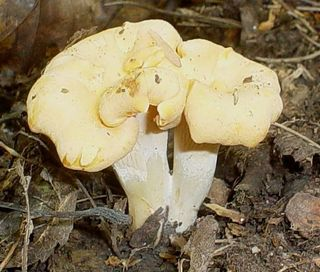

In [ ]:
resize_train_mean, resize_train_std = get_mean_std(resize_train)

0.4109448 0.3657249 0.284294
0.22285713 0.2044589 0.18771769


In [ ]:
resize_test_mean, resize_test_std = get_mean_std(resize_test)

0.40462446 0.35786796 0.27930692
0.22465402 0.20573209 0.18824874


#하이퍼 파라미터 batch size 수정부분

In [ ]:
transform_train = transforms.Compose([
    transforms.Resize((224, 224)), # 이미지 resize

    # transforms.RandomCrop(124), # 이미지를 랜덤으로 크롭
    # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2), # 이미지 지터링(밝기, 대조, 채비, 색조)
    # transforms.RandomHorizontalFlip(p = 1), # p확률로 이미지 좌우반전
    # transforms.RandomVerticalFlip(p = 1), # p확률로 상하반전

    transforms.ToTensor(),
    transforms.Normalize(resize_train_mean, resize_train_std)
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Normalize(resize_test_mean, resize_test_std)
])

trainset = datasets.ImageFolder(root=train_path, transform=transform_train)
testset = datasets.ImageFolder(root=test_path, transform=transform_test)

# epoch마다 data shuffle
# >>>>>>>>>>> hyperparameter - batch size <<<<<<<<<<<<
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256,
                                          shuffle=True, num_workers=0)

testloader = torch.utils.data.DataLoader(testset, batch_size=256,
                                         shuffle=True, num_workers=0)

In [ ]:
print(trainloader.dataset.classes)

['Amanita_bisporigera', 'Amanita_muscaria', 'Boletus_edulis', 'Cantharellus', 'Omphalotus_olearius', 'Russula_mariae']


In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
images.shape

torch.Size([256, 3, 224, 224])

In [ ]:
def imshow(img, mean, std):
    npimg = img.numpy()
    img = np.transpose( npimg, (1, 2, 0) )
    img = img * std + mean # renormalize
    img = img.clip(0, 1)
    plt.imshow(img)
    plt.show()


none_trans = datasets.ImageFolder(root=train_path, transform=None)

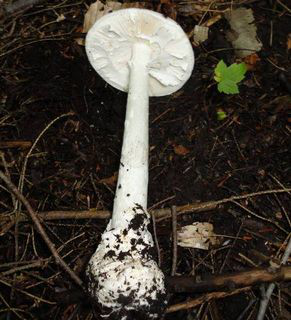

In [ ]:
# 원본 이미지
none_trans[0][0]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
print('학습을 진행하는 기기:', device) # cuda가 나온다면 GPU 사용이 가능한 것

학습을 진행하는 기기: cuda


In [ ]:
# pre-trained model 불러오기
# 이미지 분류 문제를 해결할 수 있도록 규모가 큰 데이터로 미리 학습된 모델
model = models.resnet152(pretrained=True)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

#하이퍼 파라미터 lr 수정 부분

In [ ]:
# Freeze network
for param in model.parameters():
    param.requires_grad = False

# 순서를 갖는 모듈의 컨테이너
# 정의된 것과 같은 순서로 모든 모듈들을 통해 전달 -> 신경망을 빠르게 제작
# 참고: https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html
# nn.Linear(input_dim, output_dim)
# nn.ReLu() - 선형 변환 후에 적용되어 비선형성을 도입
# nn.Dropout() - dropout layer를 추가
# nn.LogSoftmax - 신경망의 마지막 선형 계층을 전달받아 logits을 반환
num_classes = 6
# num_ftrs = model.fc.in_features


model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.3),
                                 nn.Linear(512, num_classes),
                                 nn.LogSoftmax(dim=1)
                                )
criterion = torch.nn.CrossEntropyLoss()
# # >>>>>>>>>>> hyperparameter - learning rate <<<<<<<<<<<<
# optimizer = optim.Adam(model.fc.parameters(), lr=0.002, weight_decay=0.0)
# scheduler = optim.lr_scheduler.LambdaLR(optimizer, lambda epoch: 0.9 ** epoch)
optimizer = torch.optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer, mode='min', patience=3)
model.to(device) # NeuralNetwork의 인스턴스를 생성하고 이를 device로 이동한 뒤, 구조를 출력

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
epochs = 20
steps = 0
running_loss = 0
print_every = 20
train_losses, test_losses, train_accs, test_accs = [], [], [], []

for epoch in range(epochs):
    if(epoch > 4): optimizer.param_groups[0]["lr"] *= 0.9
    print(f'lr: {optimizer.param_groups[0]["lr"]:.4f}')
    epoch_loss = 0
    epoch_accuracy = 0
    epoch_val_accuracy = 0
    epoch_val_loss = 0
    for data, label in trainloader:
        data = data.to(device)
        label = label.to(device)

        output = model(data)
        loss = criterion(output, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        acc = (output.argmax(dim=1) == label).float().mean()
        epoch_accuracy += acc / len(trainloader)
        epoch_loss += loss / len(trainloader)

    if steps % print_every == 0:
      with torch.no_grad():

          for data, label in testloader:
              data = data.to(device)
              label = label.to(device)

              val_output = model(data)
              val_loss = criterion(val_output, label)

              acc = (val_output.argmax(dim=1) == label).float().mean()
              epoch_val_accuracy += acc / len(testloader)
              epoch_val_loss += val_loss / len(testloader)
              
      
      print(
          f"Epoch : {epoch+1} - loss : {epoch_loss:.4f} - acc: {epoch_accuracy:.4f} - val_loss : {epoch_val_loss:.4f} - val_acc: {epoch_val_accuracy:.4f}\n"
      )
      model.train()

      train_losses.append(epoch_loss)
      test_losses.append(epoch_val_loss)
      train_accs.append(epoch_accuracy)
      test_accs.append(epoch_val_accuracy)
      
    print('\n')

torch.save(model, 'aerialmodel.pth')

lr: 0.0030
Epoch : 1 - loss : 1.7180 - acc: 0.2737 - val_loss : 1.6203 - val_acc: 0.3430



lr: 0.0030
Epoch : 2 - loss : 1.5200 - acc: 0.4815 - val_loss : 1.3885 - val_acc: 0.5929



lr: 0.0030
Epoch : 3 - loss : 1.2706 - acc: 0.6784 - val_loss : 1.1563 - val_acc: 0.6449



lr: 0.0030
Epoch : 4 - loss : 1.0232 - acc: 0.7687 - val_loss : 0.9319 - val_acc: 0.7924



lr: 0.0030
Epoch : 5 - loss : 0.8249 - acc: 0.7999 - val_loss : 0.7568 - val_acc: 0.8206



lr: 0.0027
Epoch : 6 - loss : 0.6847 - acc: 0.8403 - val_loss : 0.6748 - val_acc: 0.8137



lr: 0.0024
Epoch : 7 - loss : 0.6038 - acc: 0.8453 - val_loss : 0.6093 - val_acc: 0.8385



lr: 0.0022
Epoch : 8 - loss : 0.5452 - acc: 0.8578 - val_loss : 0.5686 - val_acc: 0.8329



lr: 0.0020
Epoch : 9 - loss : 0.5047 - acc: 0.8670 - val_loss : 0.5317 - val_acc: 0.8523



lr: 0.0018
Epoch : 10 - loss : 0.4782 - acc: 0.8691 - val_loss : 0.5170 - val_acc: 0.8420



lr: 0.0016
Epoch : 11 - loss : 0.4529 - acc: 0.8793 - val_loss : 0.5008 - val_a

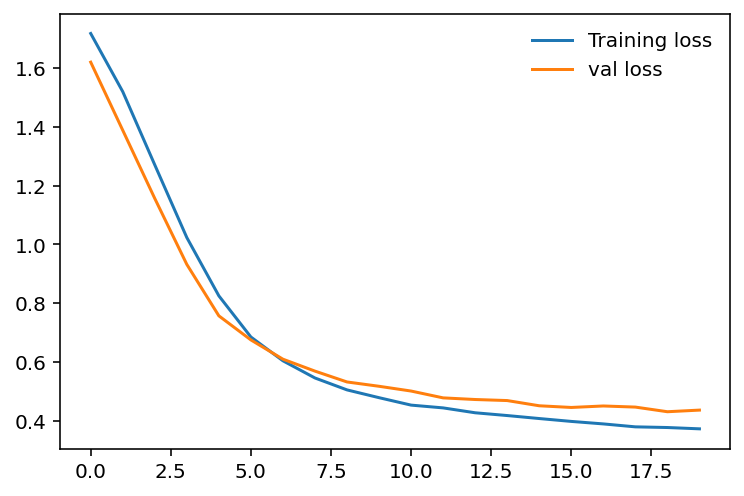

In [ ]:
import matplotlib.pyplot as plt
train_losses = [elem.item() for elem in train_losses]
test_losses = [elem.item() for elem in test_losses]
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='val loss')
plt.legend(frameon=False)
plt.show()

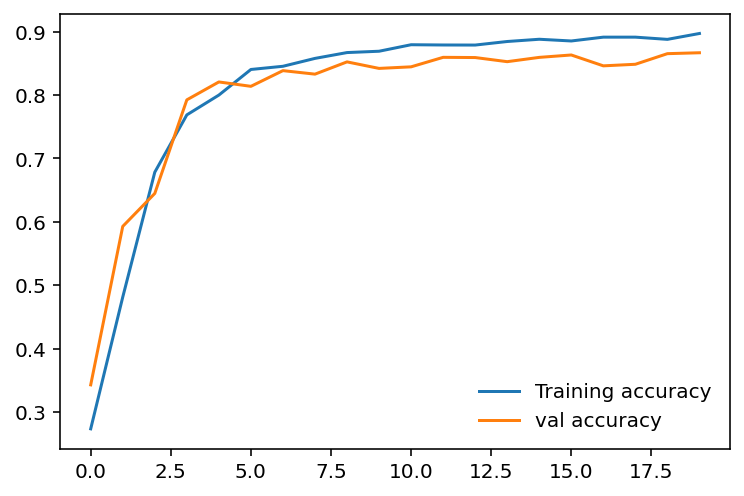

In [ ]:
train_accs = [elem.item() for elem in train_accs]
test_accs = [elem.item() for elem in test_accs]
plt.plot(train_accs, label='Training accuracy')
plt.plot(test_accs, label='val accuracy')
plt.legend(frameon=False)
plt.show()

In [ ]:
test_dir = "/content/test/"
test_transforms = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=torch.load('aerialmodel.pth')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = image_tensor
    input = input.to(device)
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    return index

In [ ]:
def get_random_images(num):
    data = datasets.ImageFolder(test_dir, transform=test_transforms)
    classes = data.classes
    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]
    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, 
                   sampler=sampler, batch_size=num)
    dataiter = iter(loader)
    images, labels = dataiter.next()
    return images, labels

TypeError: ignored

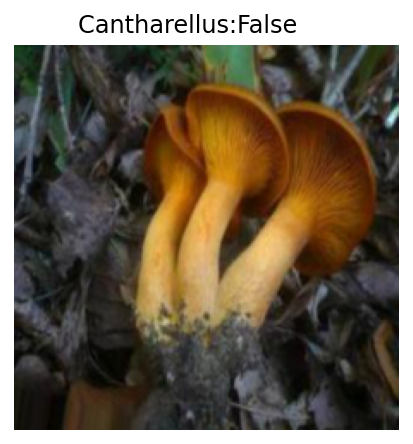

In [ ]:
import PIL
from PIL import Image,ImageDraw,ImageFont
import os
classes = trainloader.dataset.classes
to_pil = transforms.ToPILImage()
images, labels = get_random_images(5)
fig=plt.figure(figsize=(20,20))
for ii in range(len(images)):
    image = to_pil(images[ii])
    index = predict_image(image)
    sub = fig.add_subplot(1, len(images), ii+1)
    res = int(labels[ii]) == index
    sub.set_title(str(classes[index]) + ":" + str(res) + "     ")
    plt.axis('off')
    plt.imshow(image)
    draw =ImageDraw.Draw(image)
    if (classes[index] == ('Amanita_bisporigera'or 'Amanita_muscaria'or 'Boletus_edulis' or 'Omphalotus_olearius'or 'Russula_mariae')): 
      draw.text(str(classes[index]) + ": " + "posion",fill="black",align='bottom' )
    elif(classes[index] =='Cantharellus'):
      draw.text(str(classes[index]) + ": " + "non-posion ",fill="black",align='bottom')
plt.show()

In [ ]:
classes = trainloader.dataset.classes
to_pil = transforms.ToPILImage()
images, labels = get_random_images(5)
fig=plt.figure(figsize=(20,20))
for ii in range(len(images)):
    image = to_pil(images[ii])
    index = predict_image(image)
    sub = fig.add_subplot(1, len(images), ii+1)
    res = int(labels[ii]) == index
    sub.set_title(str(classes[index]) + ":" + str(res) + "     ")
    plt.axis('off')
    plt.imshow(image)
    if (classes[index] == ('Amanita_bisporigera'or 'Amanita_muscaria'or 'Boletus_edulis' or 'Omphalotus_olearius'or 'Russula_mariae')): 
      sub.set_title(str(classes[index]) + ": " + "posion")
    elif(classes[index] =='Cantharellus'):
      sub.set_title(str(classes[index]) + ": " + "non-posion ")
plt.show()